In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets 
import pandas  as pd
## Load the diabetes dataset
diabetes = datasets.load_diabetes()
data=diabetes.data

In [3]:
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['mae']), 
           label='Train')
  plt.plot(history.epoch, np.array(history.history['val_mae']),
           label = 'Val')
  plt.legend()
  plt.ylim([0,max(history.history['val_mae'])])

def plot_prediction(test_labels, test_predictions):
  plt.figure()
  plt.scatter(test_labels, test_predictions)
  plt.xlabel('True Values [1000$]')
  plt.ylabel('Predictions [1000$]')
  plt.axis('equal')
  plt.xlim(plt.xlim())
  plt.ylim(plt.ylim())
  _ = plt.plot([-100, 100],[-100,100])

  plt.figure()
  error = test_predictions - test_labels
  plt.hist(error, bins = 50)
  plt.xlabel("Prediction Error [1000$]")
  _ = plt.ylabel("Count")

In [4]:
X = diabetes.data
y = diabetes.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
def build_model():
  model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),                  
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ], name="MLP_model")

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model = build_model()
model.summary()

Model: "MLP_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                704       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
_________________________________________________________________


In [7]:
EPOCHS = 500
# Store training stats
history = model.fit(X_train,y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=1)

Epoch 1/500
7/8 [=========================>....] - ETA: 1s - loss: 30867.5039 - mae: 156.5863

KeyboardInterrupt: 

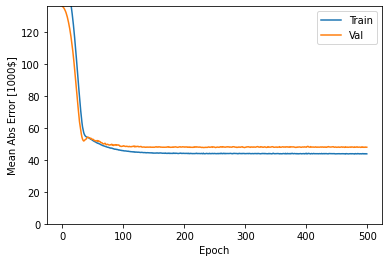

In [40]:
plot_history(history)

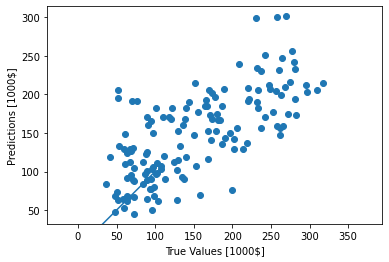

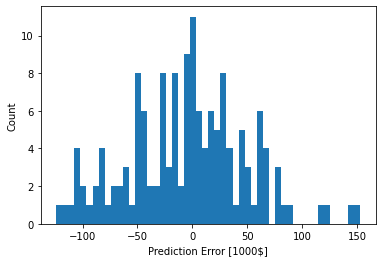

In [41]:
test_predictions = model.predict(X_test).flatten()
plot_prediction(y_test, test_predictions)

Convolution Neural Network

In [48]:
sample_size = X.shape[0] 
time_steps  = X.shape[1] 
input_dimension = 1           

X_reshaped = X.reshape(sample_size,time_steps,input_dimension)   

In [49]:
X_train_reshaped, X_test_reshaped, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.33, random_state=42)

In [52]:
def build_conv1D_model():

  n_timesteps = X_train_reshaped.shape[1] #13
  n_features  = X_test_reshaped.shape[2] #1 
  model = keras.Sequential(name="model_conv1D")
  model.add(keras.layers.Input(shape=(n_timesteps,n_features)))
  model.add(keras.layers.Conv1D(filters=64, kernel_size=7, activation='relu', name="Conv1D_1"))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', name="Conv1D_2"))
  
  model.add(keras.layers.Conv1D(filters=16, kernel_size=2, activation='relu', name="Conv1D_3"))
  
  model.add(keras.layers.MaxPooling1D(pool_size=1, name="MaxPooling1D"))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(32, activation='relu', name="Dense_1"))
  model.add(keras.layers.Dense(n_features, name="Dense_2"))


  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',optimizer=optimizer,metrics=['mae'])
  return model

model_conv1D = build_conv1D_model()
model_conv1D.summary()

Model: "model_conv1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1D_1 (Conv1D)            (None, 4, 64)             512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 64)             0         
_________________________________________________________________
Conv1D_2 (Conv1D)            (None, 2, 32)             6176      
_________________________________________________________________
Conv1D_3 (Conv1D)            (None, 1, 16)             1040      
_________________________________________________________________
MaxPooling1D (MaxPooling1D)  (None, 1, 16)             0         
_________________________________________________________________
flatten (Flatten)            (None, 16)                0         
_________________________________________________________________
Dense_1 (Dense)              (None, 32)               

In [54]:
history = model_conv1D.fit(X_train_reshaped, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=1)

Epoch 1/500
8/8 [==============================] - 1s 36ms/step - loss: 29028.9193 - mae: 152.0657 - val_loss: 23405.1582 - val_mae: 135.8917
Epoch 2/500
8/8 [==============================] - 0s 10ms/step - loss: 30698.8073 - mae: 157.0773 - val_loss: 23236.8398 - val_mae: 135.2744
Epoch 3/500
8/8 [==============================] - 0s 10ms/step - loss: 30675.3878 - mae: 156.3266 - val_loss: 22830.7285 - val_mae: 133.7828
Epoch 4/500
8/8 [==============================] - 0s 10ms/step - loss: 30773.9948 - mae: 157.0994 - val_loss: 22015.7676 - val_mae: 130.7462
Epoch 5/500
8/8 [==============================] - 0s 9ms/step - loss: 29149.6554 - mae: 150.8709 - val_loss: 20721.7773 - val_mae: 125.7897
Epoch 6/500
8/8 [==============================] - 0s 10ms/step - loss: 25872.9303 - mae: 139.6616 - val_loss: 18941.6504 - val_mae: 118.6388
Epoch 7/500
8/8 [==============================] - 0s 10ms/step - loss: 22336.0477 - mae: 128.9621 - val_loss: 16578.1445 - val_mae: 108.4442
Epoch 8

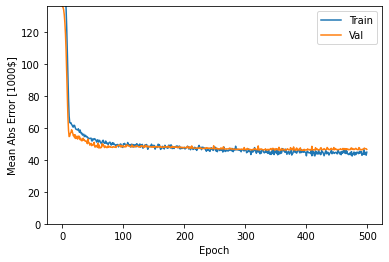

In [55]:
plot_history(history)

In [65]:
[loss, mae] = model_conv1D.evaluate(X_test_reshaped, y_test, verbose=0)
print("Testing set Mean Abs Error: {:7.2f}".format(mae))

Testing set Mean Abs Error:   42.97


Convolution Neural Network - 1

In [64]:
def build_conv11_model():

  n_timesteps = X_train_reshaped.shape[1] #13
  n_features  = X_test_reshaped.shape[2] #1 
  model = keras.Sequential(name="model_conv11D")
  model.add(keras.layers.Input(shape=(n_timesteps,n_features)))
  model.add(keras.layers.Conv1D(filters=64, kernel_size=5, activation='relu', name="Conv1D_1"))
  model.add(keras.layers.Conv1D(filters=32, kernel_size=2, activation='relu', name="Conv1D_2"))
  model.add(keras.layers.Conv1D(filters=16, kernel_size=2, activation='relu', name="Conv1D_3"))
  
  model.add(keras.layers.MaxPooling1D(pool_size=1, name="MaxPooling1D"))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(32, activation='relu', name="Dense_1"))
  model.add(keras.layers.Dense(n_features, name="Dense_2"))


  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',optimizer=optimizer,metrics=['mae'])
  return model

model_conv11 = build_conv11_model()
model_conv11.summary()

Model: "model_conv1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1D_1 (Conv1D)            (None, 6, 64)             384       
_________________________________________________________________
Conv1D_2 (Conv1D)            (None, 5, 32)             4128      
_________________________________________________________________
Conv1D_3 (Conv1D)            (None, 4, 16)             1040      
_________________________________________________________________
MaxPooling1D (MaxPooling1D)  (None, 4, 16)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
Dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
Dense_2 (Dense)              (None, 1)                

In [66]:
history = model_conv11.fit(X_train_reshaped, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=1)

Epoch 1/500
8/8 [==============================] - 1s 32ms/step - loss: 30156.8088 - mae: 154.8068 - val_loss: 23383.0410 - val_mae: 135.8122
Epoch 2/500
8/8 [==============================] - 0s 8ms/step - loss: 31482.6239 - mae: 158.0457 - val_loss: 23104.3496 - val_mae: 134.7888
Epoch 3/500
8/8 [==============================] - 0s 9ms/step - loss: 30047.3312 - mae: 155.2198 - val_loss: 22352.4863 - val_mae: 132.0007
Epoch 4/500
8/8 [==============================] - 0s 9ms/step - loss: 28479.1155 - mae: 149.4175 - val_loss: 20837.4961 - val_mae: 126.2060
Epoch 5/500
8/8 [==============================] - 0s 8ms/step - loss: 27052.6788 - mae: 143.6304 - val_loss: 18510.5625 - val_mae: 116.7596
Epoch 6/500
8/8 [==============================] - 0s 8ms/step - loss: 25075.0499 - mae: 137.7060 - val_loss: 15231.6660 - val_mae: 102.0001
Epoch 7/500
8/8 [==============================] - 0s 8ms/step - loss: 19343.6189 - mae: 117.2568 - val_loss: 11334.2598 - val_mae: 82.3559
Epoch 8/500
8

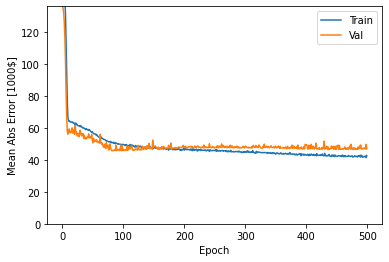

In [67]:
plot_history(history)

In [68]:
[loss, mae] = model_conv11.evaluate(X_test_reshaped, y_test, verbose=0)
print("Testing set Mean Abs Error: {:7.2f}".format(mae))

Testing set Mean Abs Error:   42.86


Convolution Neural Network -2

In [83]:
def build_conv12_model():

  n_timesteps = X_train_reshaped.shape[1] #13
  n_features  = X_test_reshaped.shape[2] #1 
  model = keras.Sequential(name="model_conv12D")
  model.add(keras.layers.Input(shape=(n_timesteps,n_features)))
  model.add(keras.layers.Conv1D(filters=64, kernel_size=5, activation='relu', name="Conv1D_1"))
  model.add(keras.layers.Conv1D(filters=32, kernel_size=2, activation='relu', name="Conv1D_2"))
  model.add(keras.layers.Conv1D(filters=16, kernel_size=2, activation='relu', name="Conv1D_3"))
  model.add(keras.layers.MaxPooling1D(pool_size=1, name="MinPooling1D"))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(32, activation='relu', name="Dense_1"))
  model.add(keras.layers.Dense(32, activation='relu', name="Dense_2"))
  model.add(keras.layers.Dense(n_features, name="Dense_3"))


  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',optimizer=optimizer,metrics=['mae'])
  return model

model_conv12 = build_conv12_model()
model_conv12.summary()

Model: "model_conv12D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1D_1 (Conv1D)            (None, 6, 64)             384       
_________________________________________________________________
Conv1D_2 (Conv1D)            (None, 5, 32)             4128      
_________________________________________________________________
Conv1D_3 (Conv1D)            (None, 4, 16)             1040      
_________________________________________________________________
MinPooling1D (MaxPooling1D)  (None, 4, 16)             0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 64)                0         
_________________________________________________________________
Dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
Dense_2 (Dense)              (None, 32)              

In [84]:
history = model_conv12.fit(X_train_reshaped, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=1)

Epoch 1/500
8/8 [==============================] - 2s 37ms/step - loss: 28771.8118 - mae: 150.2756 - val_loss: 23294.6758 - val_mae: 135.4789
Epoch 2/500
8/8 [==============================] - 0s 9ms/step - loss: 30180.4167 - mae: 154.2278 - val_loss: 22475.2402 - val_mae: 132.4223
Epoch 3/500
8/8 [==============================] - 0s 9ms/step - loss: 29649.1159 - mae: 153.3795 - val_loss: 20203.0703 - val_mae: 123.6228
Epoch 4/500
8/8 [==============================] - 0s 9ms/step - loss: 26554.8620 - mae: 141.8672 - val_loss: 15691.0430 - val_mae: 104.0185
Epoch 5/500
8/8 [==============================] - 0s 9ms/step - loss: 19400.8743 - mae: 116.1207 - val_loss: 9584.0791 - val_mae: 74.0421
Epoch 6/500
8/8 [==============================] - 0s 11ms/step - loss: 11856.0820 - mae: 85.7769 - val_loss: 5252.9155 - val_mae: 57.4578
Epoch 7/500
8/8 [==============================] - 0s 11ms/step - loss: 6992.5263 - mae: 65.6669 - val_loss: 4669.3076 - val_mae: 57.6039
Epoch 8/500
8/8 [==

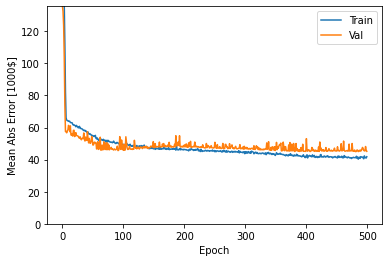

In [85]:
plot_history(history)

In [89]:
[loss, mae] = model_conv12.evaluate(X_test_reshaped, y_test, verbose=0)
print("Testing set Mean Abs Error: {:7.2f}".format(mae))

Testing set Mean Abs Error:   43.34


Convolution Neural Network -3

In [97]:
def build_conv13_model():

  n_timesteps = X_train_reshaped.shape[1] 
  n_features  = X_test_reshaped.shape[2] 
  model = keras.Sequential(name="model_conv13D")
  model.add(keras.layers.Input(shape=(n_timesteps,n_features)))
  model.add(keras.layers.Conv1D(filters=64, kernel_size=5, activation='relu', name="Conv1D_1"))
  model.add(keras.layers.Conv1D(filters=32, kernel_size=2, activation='relu', name="Conv1D_2"))
  model.add(keras.layers.Conv1D(filters=16, kernel_size=2, activation='relu', name="Conv1D_3"))
  model.add(keras.layers.MaxPooling1D(pool_size=1, name="MinPooling1D"))
  model.add(keras.layers.Conv1D(filters=9, kernel_size=2, activation='relu', name="Conv1D_4"))
  model.add(keras.layers.MaxPooling1D(pool_size=1, name="MinPooling2D"))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(32, activation='relu', name="Dense_1"))
  model.add(keras.layers.Dense(32, activation='relu', name="Dense_2"))
  model.add(keras.layers.Dense(n_features, name="Dense_3"))


  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',optimizer=optimizer,metrics=['mae'])
  return model

model_conv13 = build_conv13_model()
model_conv13.summary()

Model: "model_conv13D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1D_1 (Conv1D)            (None, 6, 64)             384       
_________________________________________________________________
Conv1D_2 (Conv1D)            (None, 5, 32)             4128      
_________________________________________________________________
Conv1D_3 (Conv1D)            (None, 4, 16)             1040      
_________________________________________________________________
MinPooling1D (MaxPooling1D)  (None, 4, 16)             0         
_________________________________________________________________
Conv1D_4 (Conv1D)            (None, 3, 9)              297       
_________________________________________________________________
MinPooling2D (MaxPooling1D)  (None, 3, 9)              0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 27)              

In [98]:
history = model_conv13.fit(X_train_reshaped, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=1)

Epoch 1/500
8/8 [==============================] - 1s 34ms/step - loss: 30128.7431 - mae: 154.4970 - val_loss: 23408.5703 - val_mae: 135.9047
Epoch 2/500
8/8 [==============================] - 0s 8ms/step - loss: 31587.0751 - mae: 158.3237 - val_loss: 23207.2441 - val_mae: 135.1676
Epoch 3/500
8/8 [==============================] - 0s 9ms/step - loss: 30146.0829 - mae: 153.8383 - val_loss: 22520.3711 - val_mae: 132.6331
Epoch 4/500
8/8 [==============================] - 0s 9ms/step - loss: 28535.1031 - mae: 151.0829 - val_loss: 20853.3125 - val_mae: 126.2701
Epoch 5/500
8/8 [==============================] - 0s 8ms/step - loss: 26297.7739 - mae: 141.1901 - val_loss: 17290.0977 - val_mae: 111.5145
Epoch 6/500
8/8 [==============================] - 0s 9ms/step - loss: 21265.7457 - mae: 121.9687 - val_loss: 11865.9541 - val_mae: 85.0366
Epoch 7/500
8/8 [==============================] - 0s 10ms/step - loss: 15368.5422 - mae: 98.0216 - val_loss: 6391.1045 - val_mae: 61.3312
Epoch 8/500
8/8

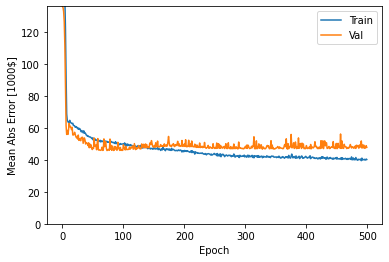

In [99]:
plot_history(history)

In [100]:
[loss, mae] = model_conv13.evaluate(X_test_reshaped, y_test, verbose=0)
print("Testing set Mean Abs Error: {:7.2f}".format(mae))

Testing set Mean Abs Error:   43.96
